In [1]:
import os
import sklearn
import pandas as pd
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.naive_bayes import GaussianNB
from sklearn import tree
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import SGDClassifier,RidgeClassifier
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,HistGradientBoostingClassifier, ExtraTreesClassifier
from sklearn import metrics
from skimage.feature import hog
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.base import BaseEstimator,TransformerMixin

In [3]:
import tensorflow as tf
from tensorflow.keras import layers, models

In [4]:
df = pd.read_csv('train.csv')
print(df.head())

   id       v1       v2       v3       v4       v5       v6       v7       v8  \
0   1  0.37797 -0.94808  0.01346  0.17893  0.37795  0.63571  0.13943 -0.25607   
1   2  0.07609 -0.09774  0.39666 -0.39026  0.10606  0.52774  0.07105  0.33720   
2   3  1.19391 -0.68707 -0.68422 -0.36378 -0.60847 -0.40118  1.45432  0.00592   
3   4  1.34949 -0.31498 -1.30248  0.50278  1.66292 -1.06094 -0.70835 -0.24237   
4   5 -0.03512 -0.34196  0.14230  1.50513 -0.14364  0.49429  0.07823 -0.04356   

        v9  ...     v504     v505     v506     v507     v508     v509  \
0 -0.39341  ... -0.03494  1.32443 -0.94570  0.02055 -1.23908  0.43507   
1  0.69917  ...  0.86624 -1.24953 -0.21511 -1.54146  1.04765 -1.24035   
2  1.68940  ... -0.35893  0.02330  0.31548 -0.34923 -0.41772 -0.58175   
3 -0.15509  ...  0.23942  0.20774  0.81792 -0.74814 -0.62521  0.01689   
4  0.42009  ... -1.78407  0.07465  1.50182 -0.41289 -0.55908 -0.29702   

      v510     v511     v512  glasses  
0  1.08635  1.69027  0.61609      

In [5]:

X_df = df.drop(columns=['id','glasses'])
X = X_df.to_numpy()
y = df['glasses'].to_numpy()
print(X)
print(X.shape)
print(len(y))

count_zero = [i for i in y if i == 0 ]
count_one = [i for i in y if i == 1]

count_sum = len(count_zero)+len(count_one)

print(len(count_zero)/count_sum,len(count_one)/count_sum)

[[ 0.37797 -0.94808  0.01346 ...  1.08635  1.69027  0.61609]
 [ 0.07609 -0.09774  0.39666 ...  0.00866 -1.2764  -0.60496]
 [ 1.19391 -0.68707 -0.68422 ... -0.60177  0.43555  0.41982]
 ...
 [-0.81564 -0.46034 -0.40044 ...  0.14222  0.10394 -0.33635]
 [ 0.09764 -0.0544  -1.53883 ... -0.25393  0.84022 -0.13068]
 [ 0.48335  1.66099 -1.98407 ...  0.06201 -2.24746  0.17192]]
(4500, 512)
4500
0.36533333333333334 0.6346666666666667


In [6]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=int(500), random_state=51)

In [7]:
def grid_search_model(model, model_para, X, y):
    print(f"gridseraching model: {model}")
    print(f"parameter: {model_para}")
    model_pipeline = Pipeline([('scaler', StandardScaler()), ('model', model)])
    clf = GridSearchCV(model_pipeline, model_para, scoring='f1',verbose=2)
    clf.fit(X,y)
    print(f"f1score : {clf.best_score_}")
    return (clf.best_estimator_)

if __name__ == '__main__':
    models = [SGDClassifier(loss='modified_huber'),KNeighborsClassifier(n_neighbors=2)]
    model_paras = [ [{'model__alpha': [0.0001, 0.001, 0.1]}], \
                   
                   [{'model__n_neighbors': [2, 3, 4, 5]}] \
                   ]
    
    best_models = []
    for i in range(len(models)):
        best_models.append(grid_search_model(models[i], model_paras[i], X_train,y_train))
                  

gridseraching model: SGDClassifier(loss='modified_huber')
parameter: [{'model__alpha': [0.0001, 0.001, 0.1]}]
Fitting 5 folds for each of 3 candidates, totalling 15 fits
[CV] END ................................model__alpha=0.0001; total time=   0.2s
[CV] END ................................model__alpha=0.0001; total time=   0.1s
[CV] END ................................model__alpha=0.0001; total time=   0.2s
[CV] END ................................model__alpha=0.0001; total time=   0.2s
[CV] END ................................model__alpha=0.0001; total time=   0.2s
[CV] END .................................model__alpha=0.001; total time=   0.2s
[CV] END .................................model__alpha=0.001; total time=   0.2s
[CV] END .................................model__alpha=0.001; total time=   0.2s
[CV] END .................................model__alpha=0.001; total time=   0.3s
[CV] END .................................model__alpha=0.001; total time=   0.1s
[CV] END ...........

In [8]:
def validate_model(model, X, y):
    print(f"model: {model}")
    X_train, X_valid, y_train, y_valid = train_test_split(X,y, test_size=0.5, random_state=51)
    
    clf = model
    clf.fit(X_train, y_train)
    print(f"validation mean acc: {clf.score(X_valid, y_valid)}")
    print(f"validation f1score: {metrics.f1_score(y_valid, clf.predict(X_valid))}")

if __name__ == '__main__':
    models = best_models
    # models = [GaussianNB(), tree.DecisionTreeClassifier(), KNeighborsClassifier(n_neighbors=2), \
    #     SGDClassifier(loss='modified_huber'), RandomForestClassifier(max_depth=2), AdaBoostClassifier(n_estimators=10), \
    #     HistGradientBoostingClassifier(max_iter=100), RidgeClassifier(),ExtraTreesClassifier()
    #     ]
    
    print(f"number of models: {len(models)}")

    for model in models :
        validate_model(model, X, y)
        print("\n")



number of models: 2
model: Pipeline(steps=[('scaler', StandardScaler()),
                ('model', SGDClassifier(loss='modified_huber'))])
validation mean acc: 0.9444444444444444
validation f1score: 0.9577559986481919


model: Pipeline(steps=[('scaler', StandardScaler()),
                ('model', KNeighborsClassifier(n_neighbors=2))])
validation mean acc: 0.9955555555555555
validation f1score: 0.9964838255977497




In [9]:
import pickle

def load_image(path):
    with open(path, 'rb') as f:
        image = Image.open(f).resize((96,96))
    return np.array(image)

# pickle_data need to be true for first time
pickle_data = False

if pickle_data:

    image_dir = os.path.join(os.getcwd(),'faces-spring-2020','faces-spring-2020')

    image_data = list()

    for i in range(1, len(X)+1):
        image_name = 'face-'+ str(i)+ '.png' 
        cur_path = os.path.join(image_dir,image_name)
        image_data.append(load_image(cur_path))
        if i % 500 == 0 and (i!=0):
            print(i)

    image_data = np.array(image_data)
    with open('image_data.pkl', 'wb') as f:
        pickle.dump(image_data,f)
else:
    with open('image_data.pkl', 'rb') as f:
        image_data =pickle.load(f)

In [10]:
print(len(image_data))
print(len(image_data[0]))
print(image_data.shape)

4500
96
(4500, 96, 96, 3)


In [11]:
class hogTransformer(BaseEstimator, TransformerMixin):
    def __init__(self):
        pass   


    def fit(self,X, y):
        return self
    
    def transform(self,X):
        def localhog(image):
            return hog(image, orientations=8, pixels_per_cell=(8, 8),
                    cells_per_block=(3, 3), channel_axis=-1)

        return np.array([localhog(i) for i in X])



In [12]:
vis_hog = hogTransformer()
image_hog = vis_hog.transform(image_data[:2])
print(image_hog.shape)

(2, 7200)


C:\Users\wongm\AppData\Local\Temp\ipykernel_9664\3947459407.py:9: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(4,2,1)


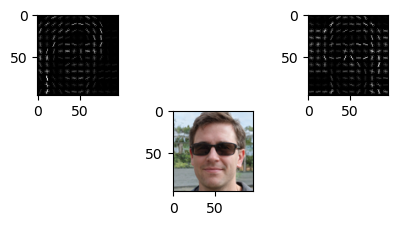

In [13]:
hog_plt = hog(image_data[0], orientations=8, pixels_per_cell=(8, 8),
                    cells_per_block=(3, 3),visualize=True, channel_axis=-1,)

plt.subplot(4,1,1)
plt.imshow(image_data[0])
plt.subplot(4,1,2)
plt.imshow(image_data[1])

plt.subplot(4,2,1)
plt.imshow(hog_plt[1],'gray')
hog_plt = hog(image_data[1], orientations=8, pixels_per_cell=(8, 8),
                    cells_per_block=(3, 3),visualize=True, channel_axis=-1,)
plt.subplot(4,2,2)
plt.imshow(hog_plt[1],'gray')



In [14]:
def validate_model_image(model, X, y):
    
    X_train, X_valid, y_train, y_valid = train_test_split(X,y, test_size=0.5, random_state=51)
    
    clf = make_pipeline(hogTransformer(), model)
    print(f"model: {clf}")
    clf.fit(X_train, y_train)
    print(f"validation mean acc: {clf.score(X_valid, y_valid)}")
    print(f"validation f1score: {metrics.f1_score(y_valid, clf.predict(X_valid))}")

if __name__ == '__main__':
    
    
    models = best_models
    
    print(f"number of models: {len(models)}")

    for model in models :
        with np.errstate(divide='ignore',invalid='ignore'):
            validate_model_image(model, image_data, y)
        print("\n")


number of models: 2
model: Pipeline(steps=[('hogtransformer', hogTransformer()),
                ('pipeline',
                 Pipeline(steps=[('scaler', StandardScaler()),
                                 ('model',
                                  SGDClassifier(loss='modified_huber'))]))])
validation mean acc: 0.8511111111111112
validation f1score: 0.8873949579831932


model: Pipeline(steps=[('hogtransformer', hogTransformer()),
                ('pipeline',
                 Pipeline(steps=[('scaler', StandardScaler()),
                                 ('model',
                                  KNeighborsClassifier(n_neighbors=2))]))])
validation mean acc: 0.8333333333333334
validation f1score: 0.8618784530386742




In [15]:
model = tf.keras.models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(96, 96, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(2))

model.summary()



Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 94, 94, 32)        896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 47, 47, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 45, 45, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 22, 22, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 20, 20, 64)        36928     
_________________________________________________________________
flatten (Flatten)            (None, 25600)             0         
_________________________________________________________________
dense (Dense)                (None, 64)                1

In [16]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])


train_images, test_images, train_labels, test_labels = train_test_split(image_data, y, test_size=0.5, random_state=51)

print(train_images.shape)

history = model.fit(train_images, train_labels, epochs=10, 
                    validation_data=(test_images, test_labels))


(2250, 96, 96, 3)
Epoch 1/10
71/71 [==============================] - 13s 44ms/step - loss: 17.9346 - accuracy: 0.6840 - val_loss: 0.9601 - val_accuracy: 0.6040
Epoch 2/10
71/71 [==============================] - 2s 32ms/step - loss: 0.5185 - accuracy: 0.7640 - val_loss: 0.3911 - val_accuracy: 0.8111
Epoch 3/10
71/71 [==============================] - 2s 32ms/step - loss: 0.3472 - accuracy: 0.8444 - val_loss: 0.3742 - val_accuracy: 0.8387
Epoch 4/10
71/71 [==============================] - 2s 30ms/step - loss: 0.3208 - accuracy: 0.8591 - val_loss: 0.3294 - val_accuracy: 0.8556
Epoch 5/10
71/71 [==============================] - 2s 30ms/step - loss: 0.2825 - accuracy: 0.8858 - val_loss: 0.3159 - val_accuracy: 0.8707
Epoch 6/10
71/71 [==============================] - 2s 31ms/step - loss: 0.2732 - accuracy: 0.8867 - val_loss: 0.3107 - val_accuracy: 0.8702
Epoch 7/10
71/71 [==============================] - 2s 30ms/step - loss: 0.2355 - accuracy: 0.9040 - val_loss: 0.3362 - val_accuracy: 

71/71 - 1s - loss: 0.4550 - accuracy: 0.8471


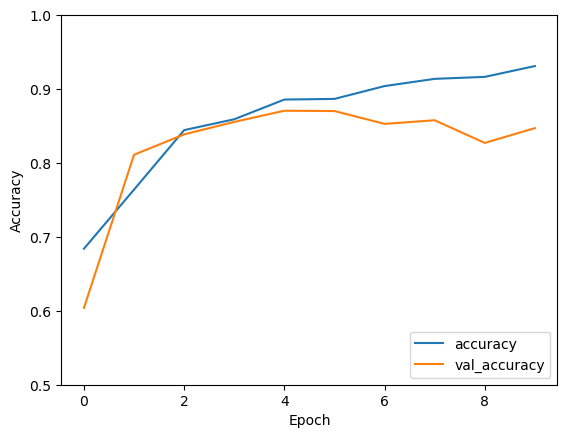

In [17]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)